## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [9]:
x=np.random.uniform(0,20,100)
y=-2*x+1

In [10]:
x=x.reshape(-1,1)
new_x=np.append(np.ones((x.shape[0],1)),x,axis=1)

#### Plot your data points. 

Text(0, 0.5, 'y')

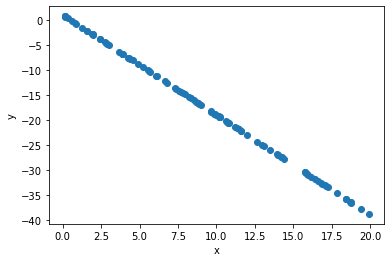

In [11]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [12]:
def BGD(x,y,learning_rate,n_epochs):
    Loss=[]
    theta0=[]
    theta1=[]
    lines=[]
    theta=np.random.rand(1,x.shape[1])
    for i in range(n_epochs):
        old_theta=theta.copy()
        print('--------------------epoch(',(i+1),')-----------------------')
        print(theta)
        theta-=learning_rate*(((x.dot(theta.T)-y.reshape(-1,1))*x).mean(axis=0))
        Loss.append(((x.dot(theta.T)-y.reshape(-1,1))**2).mean(axis=0))
        theta0.append(theta[0][0])
        theta1.append(theta[0][1])
        lines.append(new_x.dot(theta.T))
        check=theta==old_theta
        if check.all():
            break
    return theta,Loss,theta0,theta1,lines

In [13]:
theta,loss,theta0,theta1,lines=BGD(new_x,y,0.01,15)

--------------------epoch( 1 )-----------------------
[[0.5219725  0.94370397]]
--------------------epoch( 2 )-----------------------
[[ 0.25342127 -2.4885641 ]]
--------------------epoch( 3 )-----------------------
[[ 0.30625166 -1.84222466]]
--------------------epoch( 4 )-----------------------
[[ 0.29853924 -1.96414828]]
--------------------epoch( 5 )-----------------------
[[ 0.30222491 -1.94135819]]
--------------------epoch( 6 )-----------------------
[[ 0.3037576 -1.9458265]]
--------------------epoch( 7 )-----------------------
[[ 0.30568986 -1.94515984]]
--------------------epoch( 8 )-----------------------
[[ 0.30754089 -1.94545995]]
--------------------epoch( 9 )-----------------------
[[ 0.30940128 -1.94557749]]
--------------------epoch( 10 )-----------------------
[[ 0.31125398 -1.94572896]]
--------------------epoch( 11 )-----------------------
[[ 0.31310221 -1.94587356]]
--------------------epoch( 12 )-----------------------
[[ 0.3149454 -1.946019 ]]
-------------------

In [14]:
pred_y=new_x.dot(theta.T)

In [15]:
from sklearn.metrics import r2_score
print('R2: ',r2_score(pred_y,y))

R2:  0.9989736347677604


Text(0, 0.5, 'Loss')

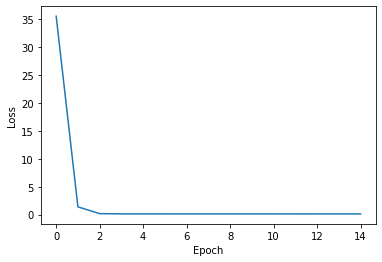

In [16]:
plt.plot(np.arange(len(loss)),loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

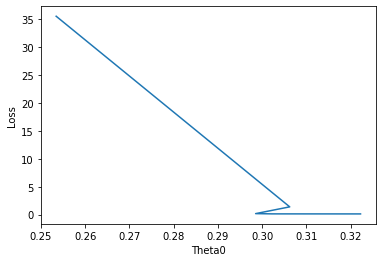

In [17]:
plt.plot(theta0,loss)
plt.xlabel('Theta0')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

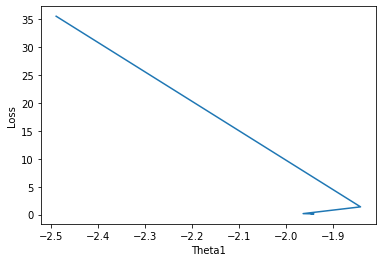

In [18]:
plt.plot(theta1,loss)
plt.xlabel('Theta1')
plt.ylabel('Loss')

Text(0, 0.5, 'y')

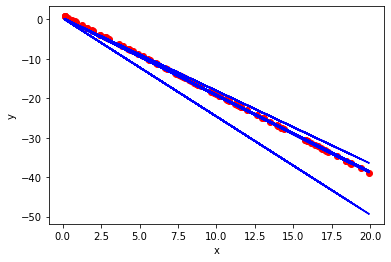

In [19]:
plt.scatter(x,y,color='red')
for i in range(len(lines)):
    plt.plot(x,lines[i],color='blue')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

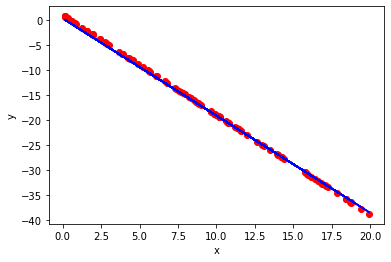

In [20]:
plt.scatter(x,y,color='red')
plt.plot(x,pred_y,color='blue')
plt.xlabel('x')
plt.ylabel('y')

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

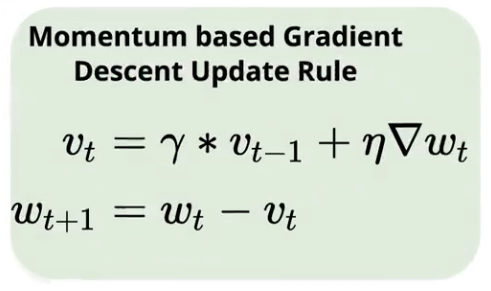

#### γ takes values between 0 and 1.
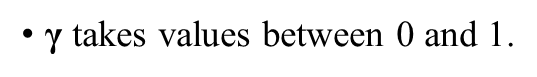

In [54]:
def Batch_momentum(x,y,learning_rate,gamma,n_epochs):
    Loss=[]
    theta0=[]
    theta1=[]
    lines=[]
    theta=np.random.rand(1,x.shape[1])
    v=np.zeros((1,x.shape[1]))
    for i in range(n_epochs):
        old_theta=theta.copy()
        print('--------------------epoch(',(i+1),')-----------------------')
        print(theta)
        v=(gamma*v)+learning_rate*(((x.dot(theta.T)-y.reshape(-1,1))*x).mean(axis=0))
        theta=theta-v
        Loss.append(((x.dot(theta.T)-y.reshape(-1,1))**2).mean(axis=0))
        theta0.append(theta[0][0])
        theta1.append(theta[0][1])
        lines.append(x.dot(theta.T))
        check=theta==old_theta
        if check.all():
            break
    return theta,Loss,theta0,theta1,lines

In [179]:
theta,loss,theta0,theta1,lines=Batch_momentum(new_x,y,0.001,0.05,500)

--------------------epoch( 1 )-----------------------
[[0.25991162 0.95165629]]
--------------------epoch( 2 )-----------------------
[[0.23324472 0.60992359]]
--------------------epoch( 3 )-----------------------
[[0.20844423 0.29171212]]
--------------------epoch( 4 )-----------------------
[[0.18671655 0.01248927]]
--------------------epoch( 5 )-----------------------
[[ 0.1677569  -0.23160484]]
--------------------epoch( 6 )-----------------------
[[ 0.15122109 -0.4449378 ]]
--------------------epoch( 7 )-----------------------
[[ 0.13680388 -0.63138353]]
--------------------epoch( 8 )-----------------------
[[ 0.12423821 -0.7943309 ]]
--------------------epoch( 9 )-----------------------
[[ 0.1132907  -0.93674182]]
--------------------epoch( 10 )-----------------------
[[ 0.10375737 -1.06120485]]
--------------------epoch( 11 )-----------------------
[[ 0.09545996 -1.1699823 ]]
--------------------epoch( 12 )-----------------------
[[ 0.08824267 -1.26505129]]
--------------------e

--------------------epoch( 148 )-----------------------
[[ 0.07263676 -1.92692549]]
--------------------epoch( 149 )-----------------------
[[ 0.0728987  -1.92694613]]
--------------------epoch( 150 )-----------------------
[[ 0.07316057 -1.92696676]]
--------------------epoch( 151 )-----------------------
[[ 0.07342237 -1.92698739]]
--------------------epoch( 152 )-----------------------
[[ 0.0736841  -1.92700802]]
--------------------epoch( 153 )-----------------------
[[ 0.07394575 -1.92702863]]
--------------------epoch( 154 )-----------------------
[[ 0.07420732 -1.92704925]]
--------------------epoch( 155 )-----------------------
[[ 0.07446883 -1.92706985]]
--------------------epoch( 156 )-----------------------
[[ 0.07473025 -1.92709045]]
--------------------epoch( 157 )-----------------------
[[ 0.07499161 -1.92711105]]
--------------------epoch( 158 )-----------------------
[[ 0.07525289 -1.92713164]]
--------------------epoch( 159 )-----------------------
[[ 0.0755141  -1.927

--------------------epoch( 310 )-----------------------
[[ 0.1141215  -1.93019441]]
--------------------epoch( 311 )-----------------------
[[ 0.11437173 -1.93021413]]
--------------------epoch( 312 )-----------------------
[[ 0.11462188 -1.93023384]]
--------------------epoch( 313 )-----------------------
[[ 0.11487197 -1.93025355]]
--------------------epoch( 314 )-----------------------
[[ 0.11512199 -1.93027325]]
--------------------epoch( 315 )-----------------------
[[ 0.11537193 -1.93029295]]
--------------------epoch( 316 )-----------------------
[[ 0.11562181 -1.93031263]]
--------------------epoch( 317 )-----------------------
[[ 0.11587161 -1.93033232]]
--------------------epoch( 318 )-----------------------
[[ 0.11612135 -1.930352  ]]
--------------------epoch( 319 )-----------------------
[[ 0.11637101 -1.93037167]]
--------------------epoch( 320 )-----------------------
[[ 0.1166206  -1.93039134]]
--------------------epoch( 321 )-----------------------
[[ 0.11687012 -1.930

--------------------epoch( 482 )-----------------------
[[ 0.15613777 -1.93350522]]
--------------------epoch( 483 )-----------------------
[[ 0.15637613 -1.933524  ]]
--------------------epoch( 484 )-----------------------
[[ 0.15661442 -1.93354278]]
--------------------epoch( 485 )-----------------------
[[ 0.15685265 -1.93356155]]
--------------------epoch( 486 )-----------------------
[[ 0.1570908  -1.93358032]]
--------------------epoch( 487 )-----------------------
[[ 0.1573289  -1.93359908]]
--------------------epoch( 488 )-----------------------
[[ 0.15756692 -1.93361783]]
--------------------epoch( 489 )-----------------------
[[ 0.15780488 -1.93363658]]
--------------------epoch( 490 )-----------------------
[[ 0.15804276 -1.93365533]]
--------------------epoch( 491 )-----------------------
[[ 0.15828059 -1.93367407]]
--------------------epoch( 492 )-----------------------
[[ 0.15851834 -1.9336928 ]]
--------------------epoch( 493 )-----------------------
[[ 0.15875603 -1.933

In [180]:
pred_y=new_x.dot(theta.T)

In [181]:
print('R2: ',r2_score(pred_y,y))

R2:  0.9984049694072707


In [182]:
print('R2: ',r2_score(pred_y,y))

R2:  0.9984049694072707


Text(0, 0.5, 'Loss')

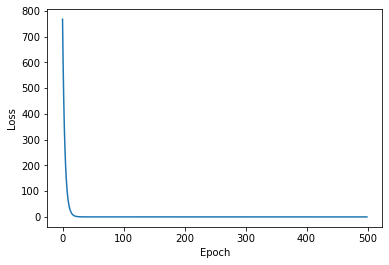

In [183]:
plt.plot(np.arange(len(loss)),loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'y')

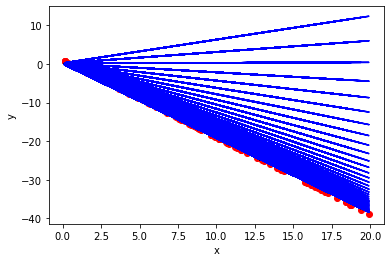

In [184]:
plt.scatter(x,y,color='red')
for i in range(len(lines)):
    plt.plot(x,lines[i],color='blue')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

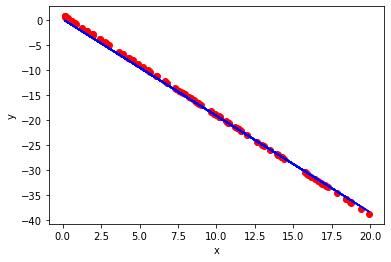

In [185]:
plt.scatter(x,y,color='red')
plt.plot(x,pred_y,color='blue')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'Loss')

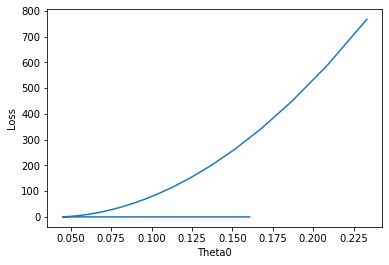

In [186]:
plt.plot(theta0,loss)
plt.xlabel('Theta0')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

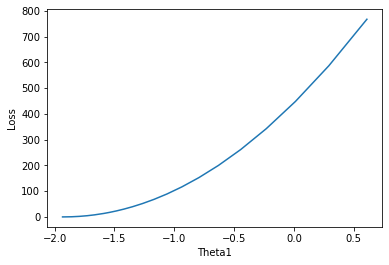

In [187]:
plt.plot(theta1,loss)
plt.xlabel('Theta1')
plt.ylabel('Loss')

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [135]:
#assume momentum with a large 
theta,loss,theta0,theta1,lines=Batch_momentum(new_x,y,0.01,1,500)

--------------------epoch( 1 )-----------------------
[[0.49578474 0.51049309]]
--------------------epoch( 2 )-----------------------
[[ 0.26772029 -2.40770073]]
--------------------epoch( 3 )-----------------------
[[ 0.08483483 -4.77638629]]
--------------------epoch( 4 )-----------------------
[[ 0.1688966  -3.78105192]]
--------------------epoch( 5 )-----------------------
[[ 0.42664526 -0.60504019]]
--------------------epoch( 6 )-----------------------
[[0.56060138 0.97669535]]
--------------------epoch( 7 )-----------------------
[[ 0.42255664 -0.91638837]]
--------------------epoch( 8 )-----------------------
[[ 0.18966984 -4.03565163]]
--------------------epoch( 9 )-----------------------
[[ 0.15390253 -4.67547204]]
--------------------epoch( 10 )-----------------------
[[ 0.37502158 -2.07687017]]
--------------------epoch( 11 )-----------------------
[[0.60952803 0.67055009]]
--------------------epoch( 12 )-----------------------
[[0.59997083 0.30018022]]
--------------------e

--------------------epoch( 190 )-----------------------
[[ 1.67661389 -1.64741393]]
--------------------epoch( 191 )-----------------------
[[1.85194976 0.76534981]]
--------------------epoch( 192 )-----------------------
[[ 1.76199534 -0.16700204]]
--------------------epoch( 193 )-----------------------
[[ 1.49422175 -3.3349651 ]]
--------------------epoch( 194 )-----------------------
[[ 1.34546136 -4.97216085]]
--------------------epoch( 195 )-----------------------
[[ 1.46922015 -3.13117045]]
--------------------epoch( 196 )-----------------------
[[1.69331922 0.00221757]]
--------------------epoch( 197 )-----------------------
[[1.72457335 0.70651475]]
--------------------epoch( 198 )-----------------------
[[ 1.49727396 -1.85298939]]
--------------------epoch( 199 )-----------------------
[[ 1.25135147 -4.63229338]]
--------------------epoch( 200 )-----------------------
[[ 1.24733158 -4.32607249]]
--------------------epoch( 201 )-----------------------
[[ 1.45682099 -1.29561487]

--------------------epoch( 387 )-----------------------
[[0.93253257 0.58942062]]
--------------------epoch( 388 )-----------------------
[[0.94738767 0.34769224]]
--------------------epoch( 389 )-----------------------
[[ 0.74477882 -2.66188706]]
--------------------epoch( 390 )-----------------------
[[ 0.60618032 -4.86604825]]
--------------------epoch( 391 )-----------------------
[[ 0.73764097 -3.64870292]]
--------------------epoch( 392 )-----------------------
[[ 1.02481207 -0.45980026]]
--------------------epoch( 393 )-----------------------
[[1.16872302 0.90774941]]
--------------------epoch( 394 )-----------------------
[[ 1.04095373 -1.17455761]]
--------------------epoch( 395 )-----------------------
[[ 0.83613016 -4.23555401]]
--------------------epoch( 396 )-----------------------
[[ 0.84052301 -4.64103906]]
--------------------epoch( 397 )-----------------------
[[ 1.0917388  -1.91252354]]
--------------------epoch( 398 )-----------------------
[[1.33391476 0.70415991]]


In [136]:
pred_y=new_x.dot(theta.T)

In [137]:
print('R2: ',r2_score(pred_y,y))

R2:  -50.52975250548859


Text(0, 0.5, 'Loss')

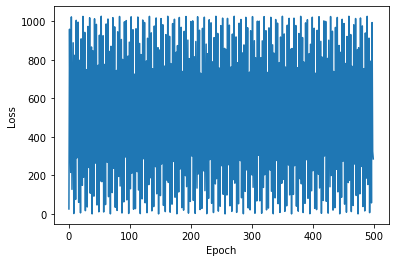

In [138]:
plt.plot(np.arange(len(loss)),loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

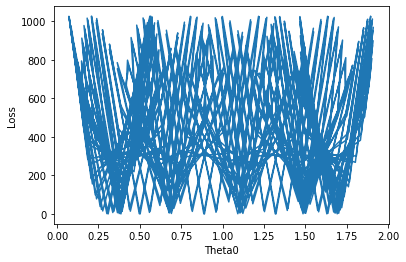

In [139]:
plt.plot(theta0,loss)
plt.xlabel('Theta0')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

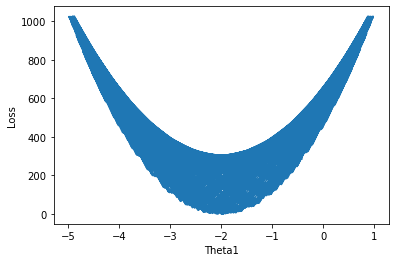

In [140]:
plt.plot(theta1,loss)
plt.xlabel('Theta1')
plt.ylabel('Loss')

### Update your Batch GD for one variable  implementation to be NAG and check your results

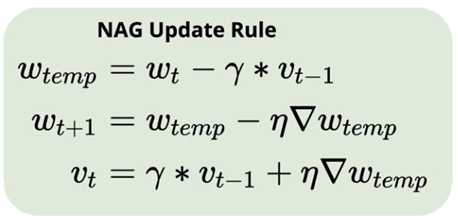

In [171]:
def Batch_nesterov(x,y,learning_rate,gamma,n_epochs):
    Loss=[]
    theta0=[]
    theta1=[]
    lines=[]
    theta=np.random.rand(1,x.shape[1])
    v=np.zeros((1,x.shape[1]))
    for i in range(n_epochs):
        old_theta=theta.copy()
        print('--------------------epoch(',(i+1),')-----------------------')
        print(theta)
        theta_temp=theta-(gamma*v)
        theta=theta_temp-learning_rate*(((x.dot(theta_temp.T)-y.reshape(-1,1))*x).mean(axis=0))
        v=(gamma*v)+learning_rate*(((x.dot(theta_temp.T)-y.reshape(-1,1))*x).mean(axis=0))
        theta=theta-v
        Loss.append(((x.dot(theta.T)-y.reshape(-1,1))**2).mean(axis=0))
        theta0.append(theta[0][0])
        theta1.append(theta[0][1])
        lines.append(x.dot(theta.T))
        check=theta==old_theta
        if check.all():
            break
    return theta,Loss,theta0,theta1,lines
theta,loss,theta0,theta1,lines=Batch_nesterov(new_x,y,0.001,0.05,500)

--------------------epoch( 1 )-----------------------
[[0.74895688 0.2089769 ]]
--------------------epoch( 2 )-----------------------
[[ 0.70843698 -0.30814243]]
--------------------epoch( 3 )-----------------------
[[ 0.67581744 -0.72514422]]
--------------------epoch( 4 )-----------------------
[[ 0.65135524 -1.03862946]]
--------------------epoch( 5 )-----------------------
[[ 0.63312297 -1.27305149]]
--------------------epoch( 6 )-----------------------
[[ 0.619555   -1.44827884]]
--------------------epoch( 7 )-----------------------
[[ 0.60947374 -1.57925584]]
--------------------epoch( 8 )-----------------------
[[ 0.60199857 -1.67715803]]
--------------------epoch( 9 )-----------------------
[[ 0.59647128 -1.75033876]]
--------------------epoch( 10 )-----------------------
[[ 0.59239987 -1.80504167]]
--------------------epoch( 11 )-----------------------
[[ 0.58941661 -1.84593353]]
--------------------epoch( 12 )-----------------------
[[ 0.58724664 -1.87650246]]
---------------

--------------------epoch( 153 )-----------------------
[[ 0.61227895 -1.9694483 ]]
--------------------epoch( 154 )-----------------------
[[ 0.61249799 -1.96946556]]
--------------------epoch( 155 )-----------------------
[[ 0.6127169  -1.96948281]]
--------------------epoch( 156 )-----------------------
[[ 0.61293568 -1.96950005]]
--------------------epoch( 157 )-----------------------
[[ 0.61315435 -1.96951728]]
--------------------epoch( 158 )-----------------------
[[ 0.61337289 -1.9695345 ]]
--------------------epoch( 159 )-----------------------
[[ 0.6135913  -1.96955171]]
--------------------epoch( 160 )-----------------------
[[ 0.6138096  -1.96956891]]
--------------------epoch( 161 )-----------------------
[[ 0.61402777 -1.9695861 ]]
--------------------epoch( 162 )-----------------------
[[ 0.61424581 -1.96960328]]
--------------------epoch( 163 )-----------------------
[[ 0.61446374 -1.96962046]]
--------------------epoch( 164 )-----------------------
[[ 0.61468153 -1.969

[[ 0.64619636 -1.97212093]]
--------------------epoch( 316 )-----------------------
[[ 0.64639623 -1.97213668]]
--------------------epoch( 317 )-----------------------
[[ 0.64659599 -1.97215242]]
--------------------epoch( 318 )-----------------------
[[ 0.64679564 -1.97216815]]
--------------------epoch( 319 )-----------------------
[[ 0.64699518 -1.97218387]]
--------------------epoch( 320 )-----------------------
[[ 0.6471946  -1.97219959]]
--------------------epoch( 321 )-----------------------
[[ 0.64739391 -1.97221529]]
--------------------epoch( 322 )-----------------------
[[ 0.6475931  -1.97223099]]
--------------------epoch( 323 )-----------------------
[[ 0.64779219 -1.97224668]]
--------------------epoch( 324 )-----------------------
[[ 0.64799116 -1.97226235]]
--------------------epoch( 325 )-----------------------
[[ 0.64819002 -1.97227802]]
--------------------epoch( 326 )-----------------------
[[ 0.64838877 -1.97229369]]
--------------------epoch( 327 )----------------

In [172]:
pred_y=new_x.dot(theta.T)

In [173]:
print('R2: ',r2_score(pred_y,y))

R2:  0.9997797692412427


Text(0, 0.5, 'Loss')

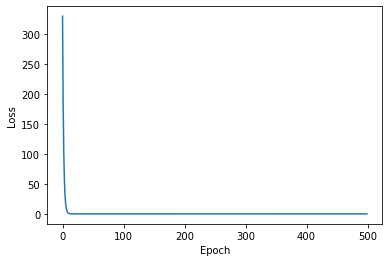

In [174]:
plt.plot(np.arange(len(loss)),loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

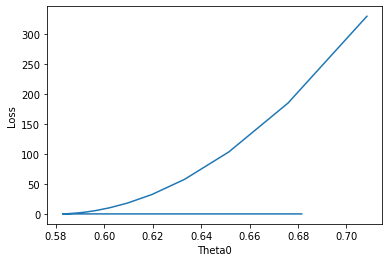

In [175]:
plt.plot(theta0,loss)
plt.xlabel('Theta0')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

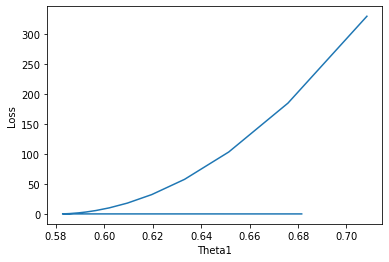

In [176]:
plt.plot(theta0,loss)
plt.xlabel('Theta1')
plt.ylabel('Loss')

Text(0, 0.5, 'y')

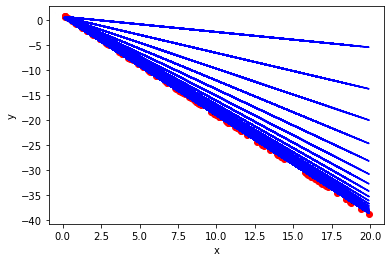

In [177]:
plt.scatter(x,y,color='red')
for i in range(len(lines)):
    plt.plot(x,lines[i],color='blue')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

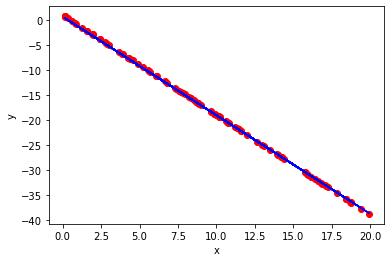

In [178]:
plt.scatter(x,y,color='red')
plt.plot(x,pred_y,color='blue')
plt.xlabel('x')
plt.ylabel('y')

## Congratulations 
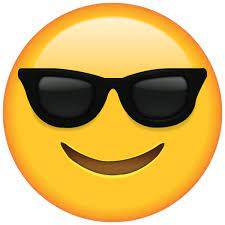